In [80]:
import pickle as pkl
from src.rating.base import RatingResult
from src.survival_runner import SurvivalResult

with open('data/rtp/multisample.pkl', 'rb') as f:
    results = pkl.load(f)

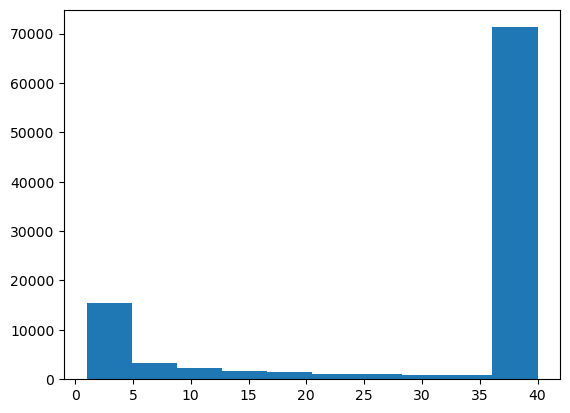

Number of samples with non-zero and non-maximum t_tilde: 18648
Number of samples with minimum t_tilde: 10071


In [81]:
from src.datasets import make_survival, make_prop, make_multisample, make_classification

# Run the function on a subsample of the data and plot a histogram of t_tilde
import matplotlib.pyplot as plt
import numpy as np

t_tildes = np.array([make_survival(result, 'toxicity', 0.5)[1] for result in results])
plt.hist(t_tildes)
plt.show()

print(f'Number of samples with non-zero and non-maximum t_tilde: {((1 < t_tildes)&(t_tildes < 40)).sum()}')
print(f'Number of samples with minimum t_tilde: {(t_tildes == 1).sum()}')

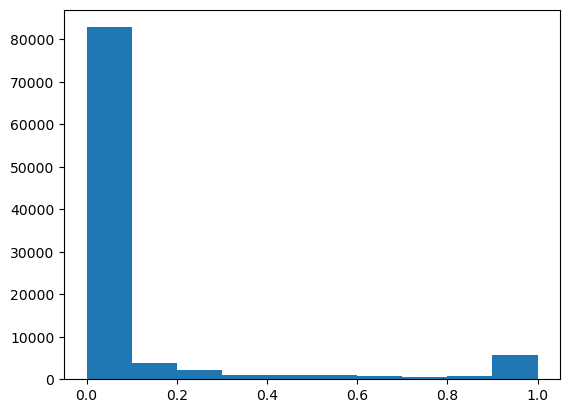

Number of samples with non-zero and non-maximum proportion of score violations: 24564


In [82]:
# Run the function on a subsample of the data and plot a histogram of the proportion of score violations
prop_score_violations = np.array([make_prop(result, 'toxicity', 0.5)[1] for result in results])
plt.hist(prop_score_violations)
plt.show()

print(f'Number of samples with non-zero and non-maximum proportion of score violations: {((0 < prop_score_violations)&(prop_score_violations < 1)).sum()}')
        

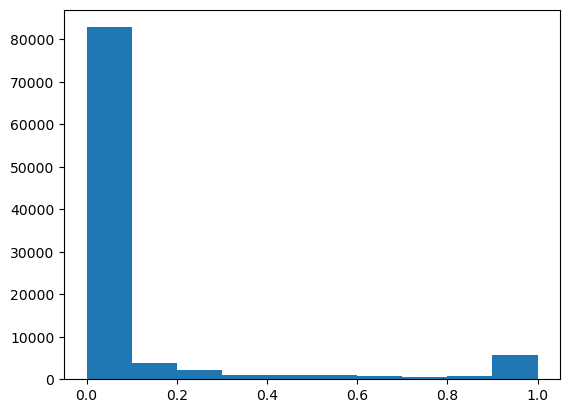

Number of samples with non-zero and non-maximum mean score violation: 24564


In [83]:
# Run the function on the full data and plot a histogram of mean score violation
ms_results = [make_multisample(result, 'toxicity', 0.5) for result in results]

# For each sublist, calculate the mean of the second elements
ms_results = np.array([np.mean([result[1] for result in sublist]) for sublist in ms_results])

plt.hist(ms_results)
plt.show()

print(f'Number of samples with non-zero and non-maximum mean score violation: {((1e-7 < ms_results)&(ms_results < (1-1e-7))).sum()}')


In [84]:
classifications = np.array([make_classification(result, 'toxicity', 0.5)[1] for result in results])

print(f'Number of samples with positive classification: {(classifications).sum()}')

Number of samples with positive classification: 10071
